<a href="https://colab.research.google.com/github/jwar28/data-science-books/blob/main/Cuaderno_3A_ANN_predicci%C3%B3n_de_la_eficiencia_de_la_gasolina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

Realizar un modelo de regresion con redes neuronales densas para predeccir la eficiencia de los vehiculos utilizando un dataset llamado Auto MPG

## Importar librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pathlib
from keras.models import Sequential
from keras.layers import Dense, Input

# Importar datos

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [ ]:
X,y

(     displacement  cylinders  horsepower  weight  acceleration  model_year  \
 0           307.0          8       130.0    3504          12.0          70   
 1           350.0          8       165.0    3693          11.5          70   
 2           318.0          8       150.0    3436          11.0          70   
 3           304.0          8       150.0    3433          12.0          70   
 4           302.0          8       140.0    3449          10.5          70   
 ..            ...        ...         ...     ...           ...         ...   
 393         140.0          4        86.0    2790          15.6          82   
 394          97.0          4        52.0    2130          24.6          82   
 395         135.0          4        84.0    2295          11.6          82   
 396         120.0          4        79.0    2625          18.6          82   
 397         119.0          4        82.0    2720          19.4          82   
 
      origin  
 0         1  
 1         1  
 2   

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


# EDA

In [ ]:
print(X.isnull().sum())
print(y.isnull().sum())

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64
mpg    0
dtype: int64


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


Limpiemos los nulos, la condicion es que cualquier nulo quitamos la fila no la columna

In [ ]:
df=X.join(y)
df

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


In [ ]:
print(df.isnull().sum())

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


In [ ]:
df.size

3184

In [ ]:
df=df.dropna(axis=0)
df.size

3136

In [ ]:
# reindexar el dataframe

In [ ]:
df=df.reset_index(drop=True)
df


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,140.0,4,86.0,2790,15.6,82,1,27.0
388,97.0,4,52.0,2130,24.6,82,2,44.0
389,135.0,4,84.0,2295,11.6,82,1,32.0
390,120.0,4,79.0,2625,18.6,82,1,28.0


Vamos a graficar la correlaciones utilizador pairplot de seaborn

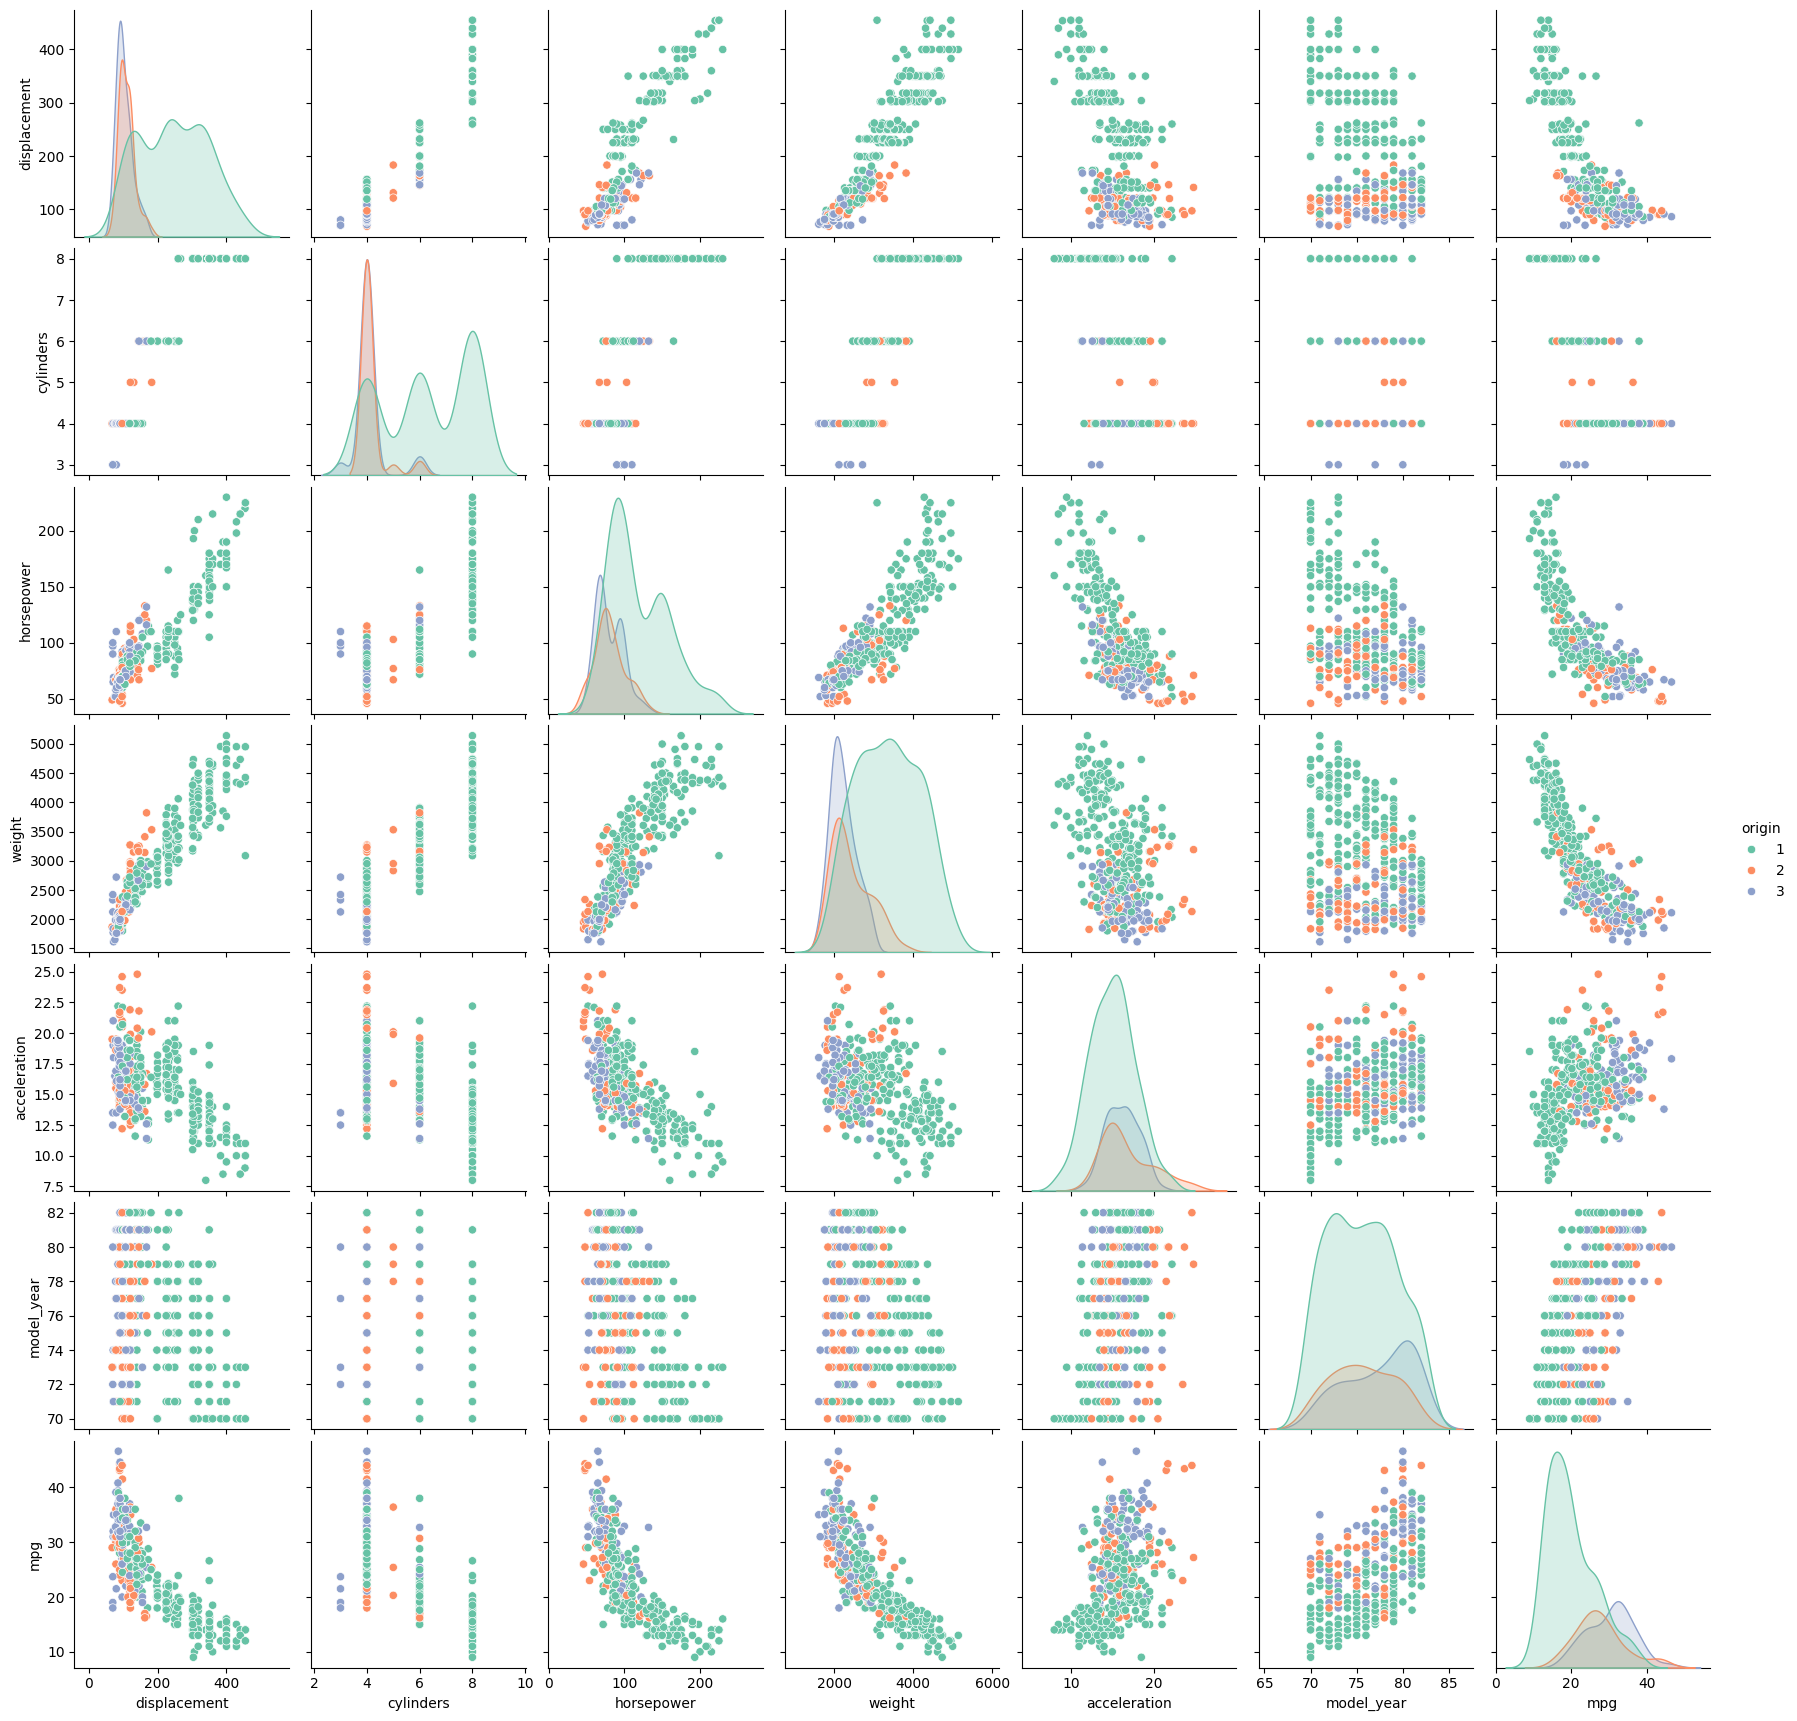

In [ ]:
sns.pairplot(df,diag_kind='kde',hue='origin', palette='Set2')


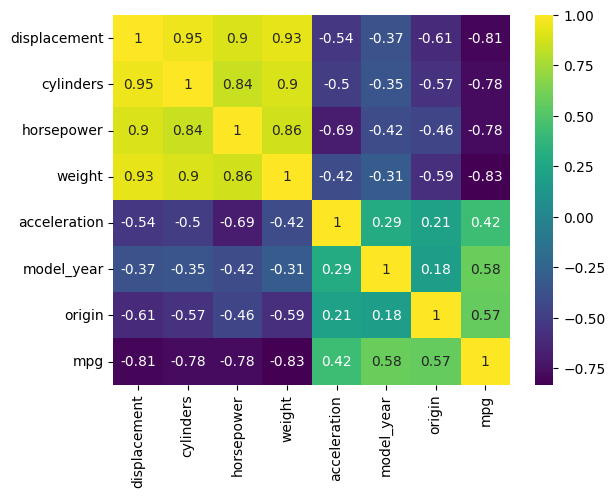

In [ ]:
heatmap=sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [ ]:
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,5.471939,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,104.644004,1.705783,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,105.000000,4.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,151.000000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,275.750000,8.000000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


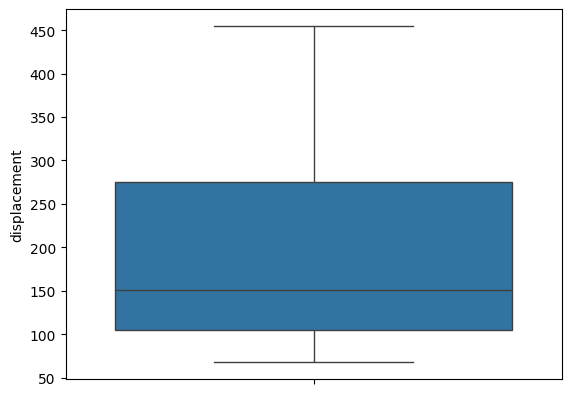

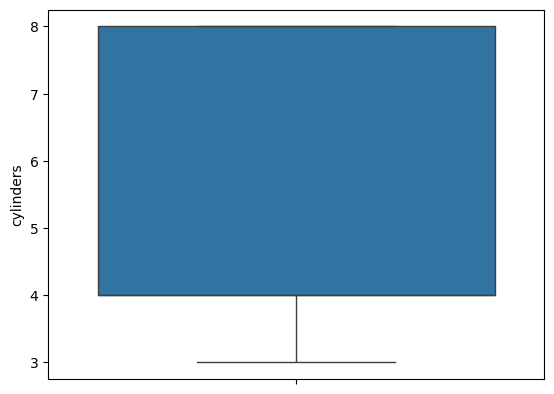

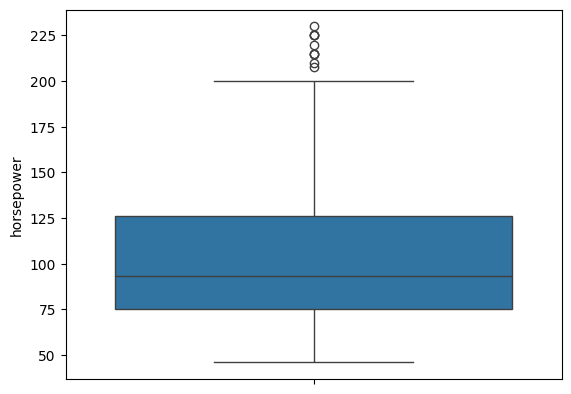

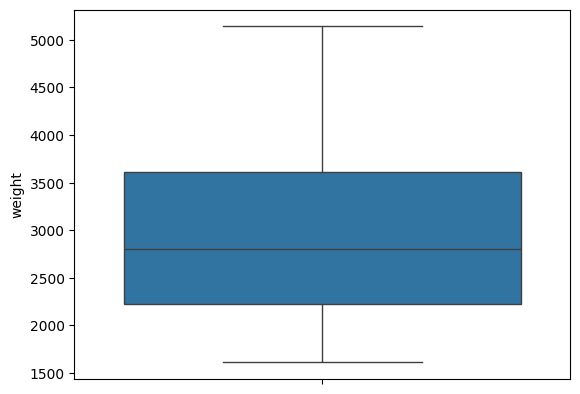

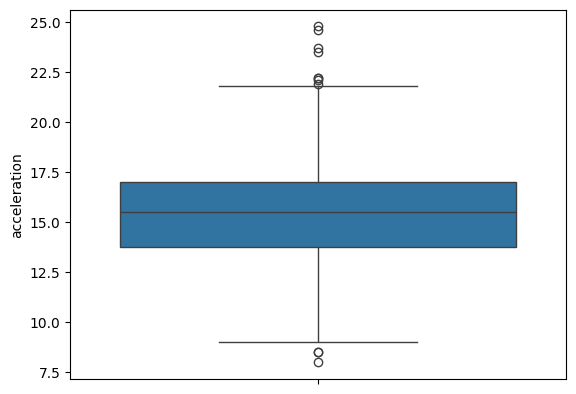

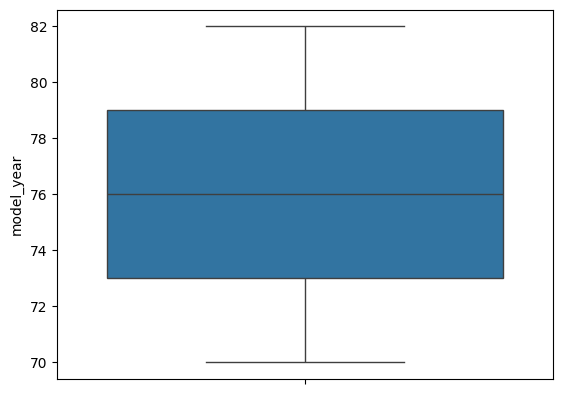

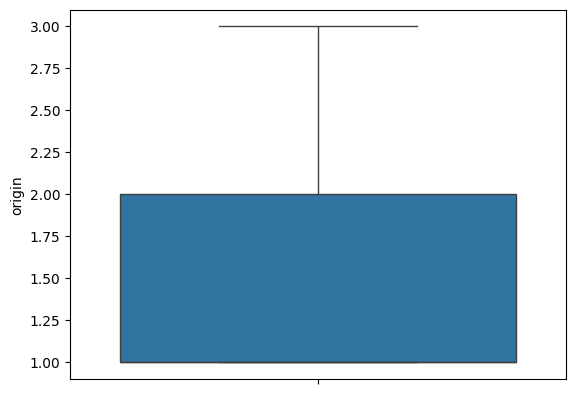

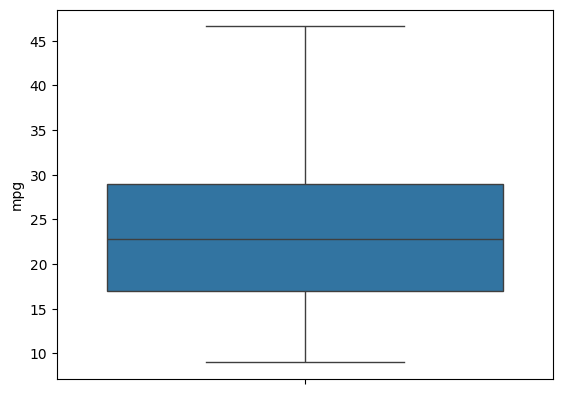

In [ ]:
for columns in df.columns:
  sns.boxplot(df[columns])
  plt.show()

In [ ]:

df = df[df['horsepower'] <= 200]


In [ ]:
X=df.drop('mpg',axis=1)
y=df['mpg']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature engineer

In [ ]:
scalador=StandardScaler()
X_train=scalador.fit_transform(X_train)
X_test=scalador.transform(X_test)

In [ ]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)
X_train_df


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,-0.712938,-0.805056,-0.137738,-0.260622,-0.300188,-0.368350,0.455476
1,-0.157386,0.422654,1.002666,0.006392,-1.691519,1.039503,1.674073
2,2.274464,1.650364,2.790326,1.755581,-1.382334,0.194791,-0.763121
3,2.274464,1.650364,2.081426,2.473799,-1.266390,-0.931491,-0.763121
4,-1.079813,-1.418910,0.324588,-0.228482,-0.879909,0.194791,1.674073
...,...,...,...,...,...,...,...
300,-0.912099,-0.805056,-0.939102,-0.884891,0.859255,-1.213061,0.455476
301,-1.205598,-0.805056,-1.555537,-1.282940,1.438976,-0.931491,0.455476
302,-0.450886,-0.805056,-0.353490,-0.018332,0.588718,0.757932,-0.763121
303,0.502987,0.422654,0.324588,0.630661,0.008997,1.321073,-0.763121


In [ ]:
y_train_df=pd.DataFrame(y_train,columns=['mpg'])
y_train_df

,mpg
175,23.0
330,32.7
229,15.5
103,12.0
241,21.5
...,...
78,26.0
116,29.0
280,22.3
358,22.4


In [ ]:
X_train_df.drop('displacement',axis=1,inplace=True)
X_test_df.drop('displacement',axis=1,inplace=True)

## Construccion del modelo
Vamos a construir un modelo de red neuronal con capas densas o densamente conectado, utilice el optimizador RMSprop con un learnig rate igual a 0.01, utilice la funcion de perdida MSE y las metricas va a utilizar mae y mse

In [ ]:

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Crear el modelo secuencial
model = Sequential()

# Añadir la capa de entrada con la forma de entrada
model.add(Input(shape=(X_train_df.shape[1],)))  # Correcto: 'Input' con 'shape' y no 'Input_shape'

# Añadir las capas densas
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='mse',
              metrics=['mae','mse'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train_df,y_train_df,epochs=100,batch_size=32,validation_data=(X_test_df,y_test))



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 516.1384 - mae: 21.5911 - mse: 516.1384 - val_loss: 104.5116 - val_mae: 9.0160 - val_mse: 104.5116
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 86.6815 - mae: 7.8666 - mse: 86.6815 - val_loss: 36.7018 - val_mae: 5.0202 - val_mse: 36.7018
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30.2840 - mae: 4.4009 - mse: 30.2840 - val_loss: 22.9018 - val_mae: 3.9450 - val_mse: 22.9018
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.4175 - mae: 3.6583 - mse: 21.4175 - val_loss: 14.4699 - val_mae: 3.0454 - val_mse: 14.4699
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.9537 - mae: 2.9870 - mse: 14.9537 - val_loss: 11.3841 - val_mae: 2.5595 - val_mse: 11.3841
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.8332 - mae: 2.5806 - mse: 12.8332 - val_loss: 15.6798 - val_mae: 2.9188 - val_mse: 15.6798
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.3639 - m

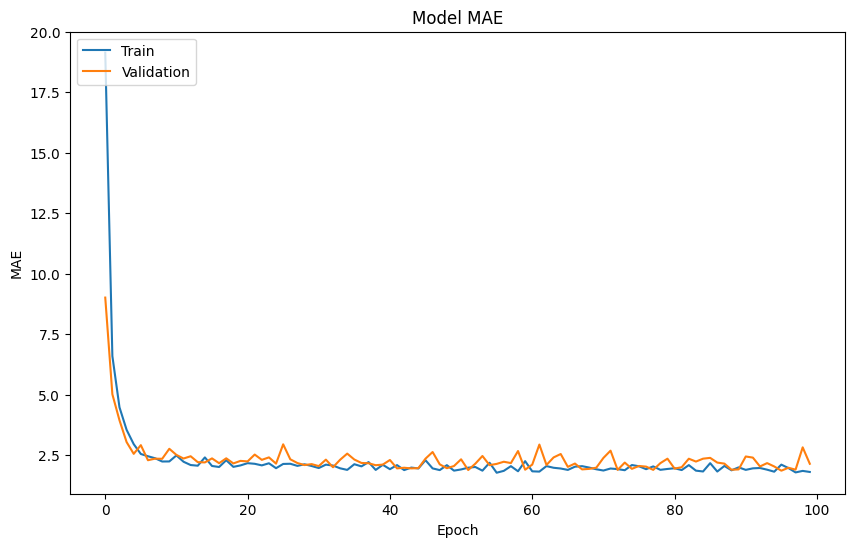

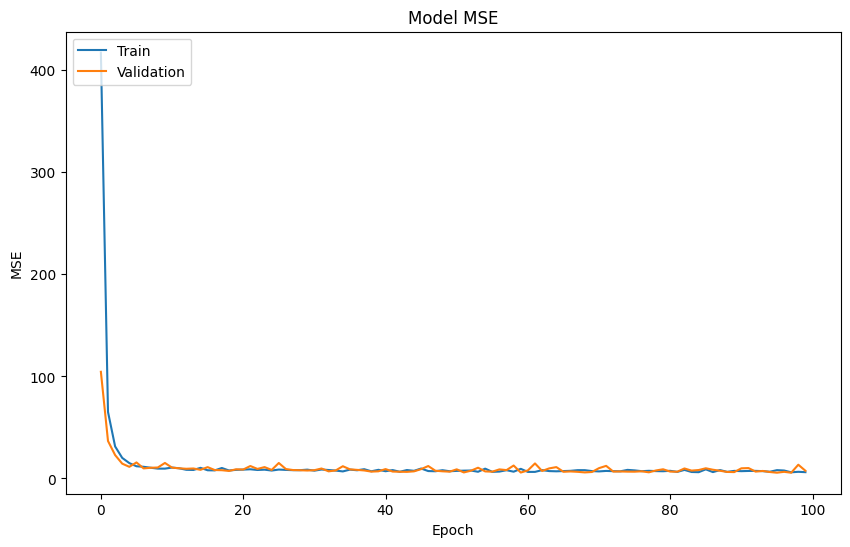

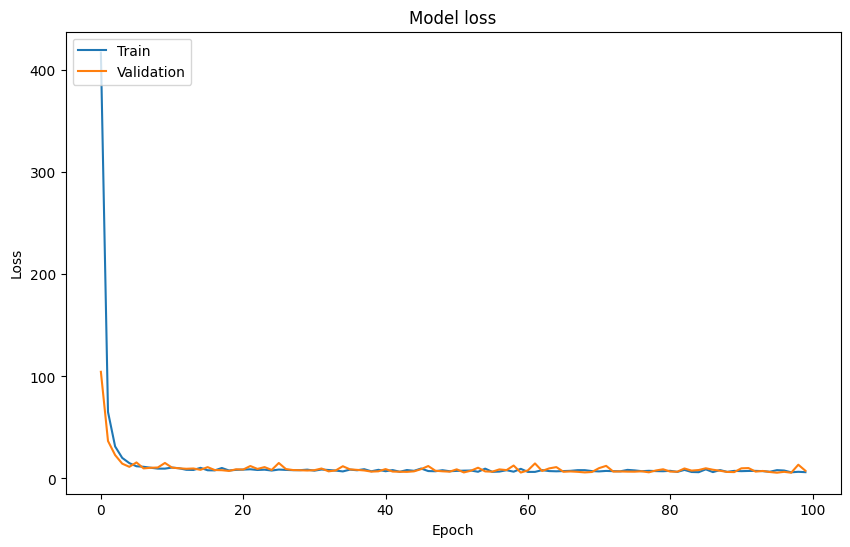

In [ ]:
# prompt: quiero graficar de la variable historia el history del mae el mse y las perdidas

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.figure(figsize=(10, 6))

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))

# Plot training & validation MSE values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
keras.models.save_model(model,'model_mpg.keras')